# Credit Card Retention Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [3]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [4]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [5]:
# https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

***

## Data Transformations: Normalization and Log

While we are still on the topic of distributions, it's important to note that there are simple ways to transform a skewed distribution into one that looks more "normal" or to normalize between two values. Let's take a look at a few together. 

We will cover two very common transformations:

    1) Normalization (also referred to as a min-max scaler): Normalization will convert all data points to values between two values (usually 0 and 1). 
    2) Log transformation: This helps make the data "less skewed". When using log with Python, the default base is usually e.
    
    
These transformations achieve very different results, as we will clearly see as we go through this. More about transformations [here](https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16#:~:text=Skewed%20data%20is%20cumbersome%20and,Root%20and%20the%20Hyperbolic%20Tangent.).

We will use the out of the box log transformation from the numpy library and write our own function for normalization.

In [6]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [7]:
data['Credit_Limit_Normalized'] = normalize(data['Credit_Limit'])
data['Credit_Limit_Log_Transformed'] = np.log(data['Credit_Limit'])

To see exactly how the transformations impact the variables we are looking at, we will use seaborn subplots to plot them side by side using `subplots`. You can read more about how to create subplots [here](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8).

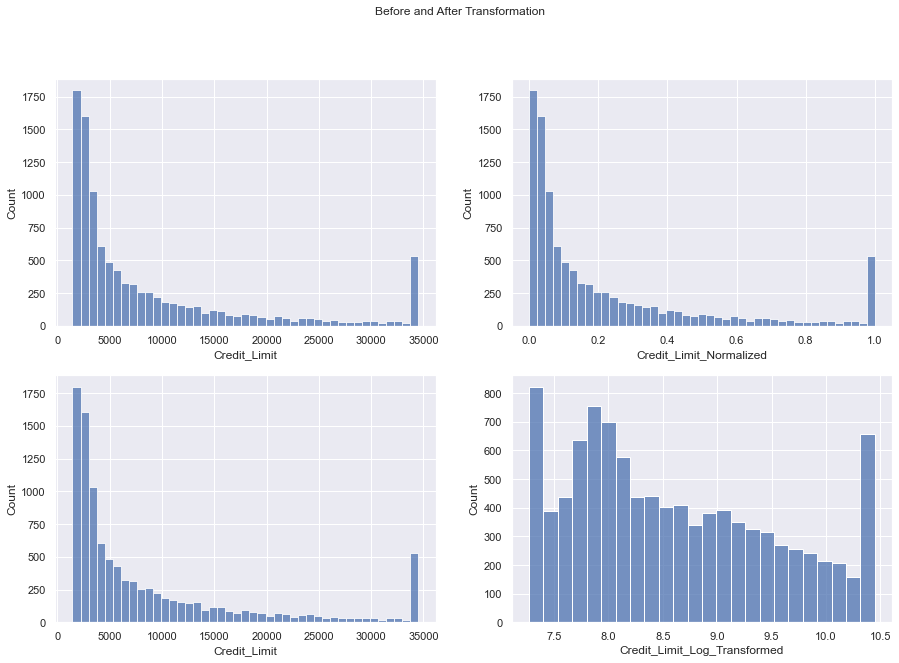

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Before and After Transformation')

#create boxplot in each subplot
sns.histplot(data, x="Credit_Limit", ax=axes[0,0])
sns.histplot(data, x="Credit_Limit_Normalized", ax=axes[0,1])
sns.histplot(data, x="Credit_Limit", ax=axes[1,0])
sns.histplot(data, x="Credit_Limit_Log_Transformed", ax=axes[1,1]);

As you can see above, when we **Normalized** the values, they maintained their shape but now are bound between 0 and 1. This method is helpful when comparing across many variables of different magnitudes (ex. Number of Relationships which ranges between 1-6 vs Credit Limit which ranges between 0 and 35K). 

However, it's clear that the **Log-Transformation** made an impact on the distribution!